The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning.

In [260]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [261]:
# Data Loadong
tables=pd.read_csv('iris_not_clean.data', sep="|",skiprows=[1,34],names=["Sepal length","Sepal width","Petal length","Petal width","Class"])
# Identifying number of rows and columns in the file
print("The numbe of rows and columns in the file is:",tables.shape)
tables.info()
# How many nulls in the file and Which rows contains nans and how many nans in each of these rows
print("The list of null in the file is:")
tables[tables.isnull().any(axis=1)]
# How many nans per columns
print("The nans per columns are:")
tables.isnull().sum()
# The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
tables.loc[35][3]=["0.2"]
# The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa", where the errors are in the second and third features. Fix it
tables.loc[38][1:3]=["3.6","1.4"]

The numbe of rows and columns in the file is: (153, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
Sepal length    151 non-null float64
Sepal width     152 non-null float64
Petal length    151 non-null float64
Petal width     151 non-null float64
Class           151 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB
The list of null in the file is:


,Sepal length,Sepal width,Petal length,Petal width,Class
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
44,NaN,3.2,2.1,NaN,NaN


The nans per columns are:


Sepal length    2
Sepal width     1
Petal length    2
Petal width     2
Class           2
dtype: int64

/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

The mean for each columns is:


Sepal length    5.8338
Sepal width     3.0572
Petal length    3.7470
Petal width     1.1921
dtype: float64

The variance for each column is:


Sepal length    0.6949
Sepal width     0.1864
Petal length    3.1138
Petal width     0.5851
dtype: float64

,Sepal length,Sepal width,Petal length,Petal width,Class
count,151.000000,152.000000,151.000000,151.000000,151
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,51
mean,5.833775,3.057237,3.747020,1.192053,NaN
std,0.833618,0.431784,1.764608,0.764942,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.300000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


The mean for each columns is:


Sepal length    5.8380
Sepal width     3.0540
Petal length    3.7580
Petal width     1.1987
dtype: float64

The variance for each column is:


Sepal length    0.6969
Sepal width     0.1880
Petal length    3.1164
Petal width     0.5824
dtype: float64

0.8197853241164544

-0.35654408961380535

0.9627551297091766

,Sepal length,Sepal width,Petal length,Petal width
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


 Randomly picked 20 samples are:


,Sepal length,Sepal width,Petal length,Petal width,Class
94,6.1,3.0,4.6,1.4,Iris-versicolor
66,6.1,2.9,4.7,1.4,Iris-versicolor
106,6.3,2.9,5.6,1.8,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
62,5.2,2.7,3.9,1.4,Iris-versicolor
31,4.8,3.1,1.6,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
37,5.5,3.5,1.3,0.2,Iris-setosa
102,5.7,2.8,4.1,1.3,Iris-versicolor
125,7.7,2.8,6.7,2.0,Iris-virginica


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ec51358>,
      dtype=object)

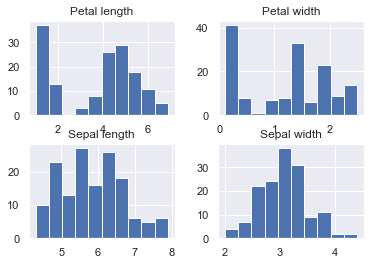

In [262]:
# Solve Here
# Calculate the mean and variance for each column
print("The mean for each columns is:")
round(tables.mean(),ndigits=4)
print("The variance for each column is:")
round(tables.var() ,ndigits=4)
# Using a functio descbribe to get insights about the data
tables.describe(include="all")
# Dropping the nan rows, new function in order not to amend the original data
clean=tables.dropna()
# Recalculating the mean and variance for each column
print("The mean for each columns is:")
round(clean.mean(),ndigits=4)
print("The variance for each column is:")
round(clean.var() ,ndigits=4)
# Identifying the correlation between the fourth column and each of the other three columns individually.
clean["Petal width"].corr(clean["Sepal length"])
clean["Petal width"].corr(clean["Sepal width"])
clean["Petal width"].corr(clean["Petal length"])
# How many records exist for each class. # Hint, you can do this in one line by using groupby
clean.groupby(["Class"]).count()
# Creating random.seed 
np.random.seed(1234)
# randomly picking 20 samples of the data and displaying it
print(" Randomly picked 20 samples are:")
clean.sample(n=20)
# Plot histogram for all the data attributes
clean.hist()

Class
Iris-setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

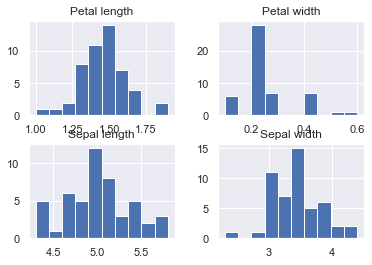

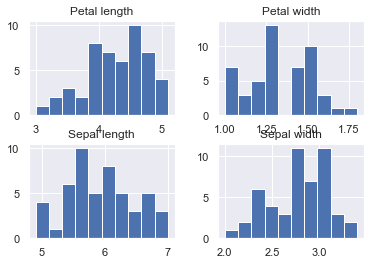

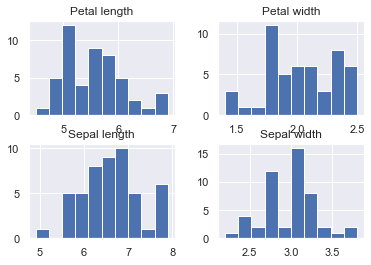

In [263]:
# Plot histogram for all the data attributes per class, i.e. grouped by classes
clean.groupby(["Class"]).hist()

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

<Figure size 1080x1080 with 0 Axes>

(array([0.4180791 , 0.14689266, 0.        , 0.03389831, 0.09039548,
        0.29378531, 0.32768362, 0.20338983, 0.12429379, 0.05649718]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Histogram of Petal Length with Estimated PDF')

 Difference between new and old mean is: 0.192


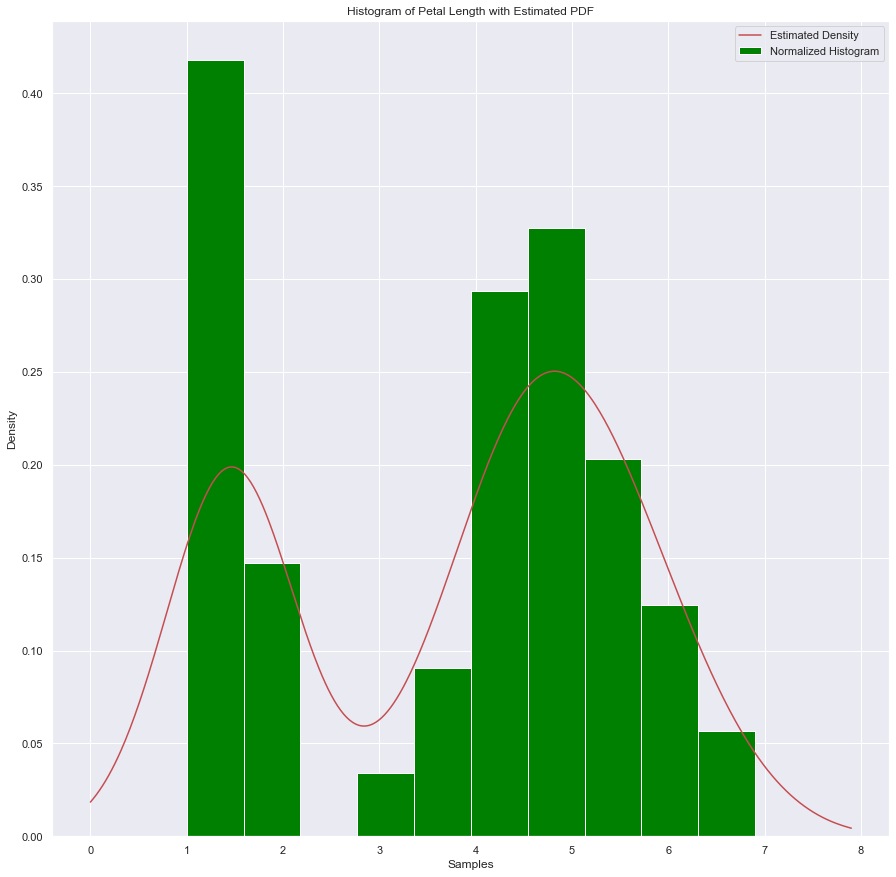

In [264]:
# Solve Here
import scipy.stats
# Variable x1 define all items of row petal length,
x1 = clean["Petal length"]   
# generating the data that we will predict where we generate new 500 samples
xs = np.linspace(x1.min()-1, x1.max()+1, 500) 
# finding out the best fit
kde1 = scipy.stats.gaussian_kde(x1)
# Adjusting the figure size to (15,15)
plt.figure(figsize=(15,15))
# ploting a normalized histogram of the petal-length
plt.hist(x1, density=True, label='Normalized Histogram', color="green")
# testing the fit for estimated density
plt.plot(xs, kde1(xs), 'r-', label="Estimated Density")  
# Labeling the Histogram
plt.xlabel('Samples')
plt.ylabel('Density')
plt.title("Histogram of Petal Length with Estimated PDF")
plt.legend()
# Calculating Old mean and New mean; before and after collecting 500 samples
new_mean=xs.mean()
old_mean=clean["Petal length"].mean()
# Comapring how close it is to the mean of the given data
print(" Difference between new and old mean is:",round(new_mean-old_mean,ndigits=3))

In [265]:
# droping the class column from the dataset in order to calculate PCA where we do not look at string variables
clear=clean.drop(["Class"], axis=1)

### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

(150, 3)

array([0.9248226 , 0.05274422, 0.01724507])

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Bar Graph of the data')

<function matplotlib.pyplot.legend(*args, **kwargs)>

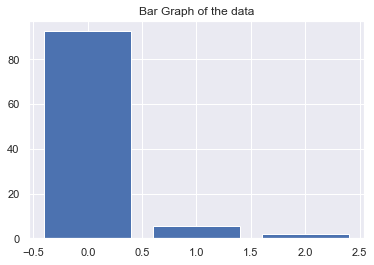

In [266]:
# Solve Here
# Create a regular PCA model 
iris_data=clear
# Asking PCA to reduce the data
pca_all= PCA(n_components=3)
# Creating a new dimension 
redcuted_pca_data= pca_all.fit_transform(iris_data)
# Check if there is change in shape of the table
redcuted_pca_data.shape
# Importance of each columns of reduced pca data
pca_all.explained_variance_ratio_
# plot the bar graph for the data
plt.bar(np.arange(0,3),pca_all.explained_variance_ratio_*100)
plt.title("Bar Graph of the data")
plt.legend

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

In [267]:
# Solve Here
from sklearn.cluster import KMeans
# Importing the dataset and keeping in the variable X
X=iris_data
# Developing the data into different cluster i.e 3 class we have
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  
# Framing the size of the scatter ploy to (10,10)
plt.figure(figsize = (10,10))
# Printing the cluster center
# print(kmeans.cluster_centers_)
# Printing the labeling of Kmeans which is 0,1,and 2 in the data given
print(kmeans.labels_) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 720x720 with 0 Axes>

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


<Figure size 720x720 with 0 Axes>

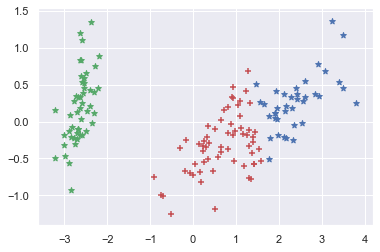

In [268]:
# Ploting a scatter plot for each two combination of the three dimension
# Labeling the reducted pca data to 0,1, and 2
X0=redcuted_pca_data[kmeans.labels_==0]
X1=redcuted_pca_data[kmeans.labels_==1]
X2=redcuted_pca_data[kmeans.labels_==2]
# Ploting the scatter plot for 0 Vs 1
# plot 0 vs 1
plt.scatter(X0[:,0], X0[:,1],color ='r',marker="+") 
plt.scatter(X1[:,0], X1[:,1],color ='g',marker="*")
plt.scatter(X2[:,0], X2[:,1],color ='b',marker="*")

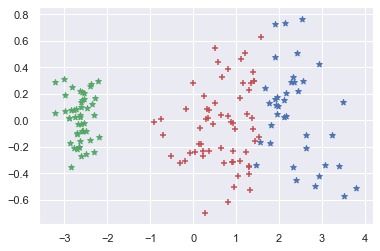

In [269]:
# Ploting the scatter plot for 0 Vs 2
# plot 0 vs 2
plt.scatter(X0[:,0], X0[:,2],color ='r',marker="+") 
plt.scatter(X1[:,0], X1[:,2],color ='g',marker="*")
plt.scatter(X2[:,0], X2[:,2],color ='b',marker="*")

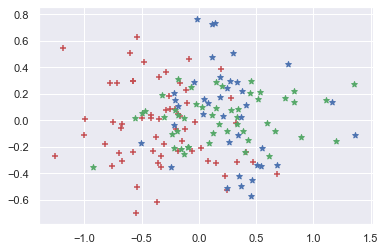

In [270]:
# Ploting the scatter plot for 1 Vs 2
# plot 1 vs 2
plt.scatter(X0[:,1], X0[:,2],color ='r',marker="+") 
plt.scatter(X1[:,1], X1[:,2],color ='g',marker="*")
plt.scatter(X2[:,1], X2[:,2],color ='b',marker="*")

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [271]:
# Labeling the class into 0,1,and 2 and using lambda funtion to assign the value accordingly.
y_class = clean['Class']
d = {"Iris-setosa":0,"Iris-virginica":1,"Iris-versicolor":2}
y=y_class.map(lambda x :  d[x])

/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
The training accuracy is: 0.9083333333333333
The validation accuracy is: 0.8666666666666667


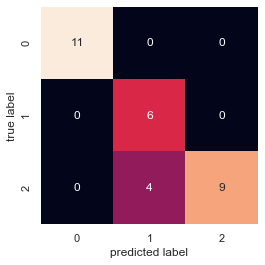

In [272]:
# Solve Here
from sklearn.model_selection import train_test_split
# import a reducted_pca_data
X= redcuted_pca_data
# Dividing the dataset to 80% training and 20% validation
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, train_size=0.8 ,random_state=0)
# building the logistic regression model for reduced IRIS dataset
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
print(logisticRegr.fit(x_train, y_train))
# Using predict method to get validation set
predictions = logisticRegr.predict(x_test)
# Using score method to get training and validation accuracy of model respectively
training=logisticRegr.score(x_train, y_train)
print("The training accuracy is:",training)
validation = logisticRegr.score(x_test, y_test)
print("The validation accuracy is:", validation)

from sklearn import metrics
# Creating a confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)


import seaborn as sns; sns.set()
# Ploting a heatmap to show the true label and predicted label
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(3),
            yticklabels=range(3))
# Labeling the x-axis and y-axis
plt.ylabel('true label')
plt.xlabel('predicted label');